In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from datetime import date
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
import time

%run ../global_variables.py ./
%run ../global_functions.py ./

In [2]:
basins=load_basins_data()

In [3]:
#%matplotlib notebook

Nbasins=194
Ndatasets=1080
data_TWS='GRACE_JPL_mascons'

NSE_tab=pd.read_csv("../results/water_budget/NSE_tab_{}basins_{}datasets_{}.csv".format(Nbasins,Ndatasets,data_TWS),index_col=[0])

In [4]:
datasets=NSE_tab.columns

Basins that cannot achieve a satisfying NSE

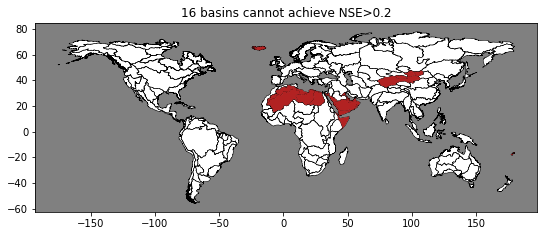

In [5]:
NSE_min=0.2
bad_basins=NSE_tab.index[np.where(np.nanmax(NSE_tab,axis=1)<=NSE_min)]

fig, ax = plt.subplots(figsize=(9,5))
ax.set_aspect('equal')
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins.loc[bad_basins].plot(ax=ax,color='firebrick',linewidth=0.5)
ax.set_facecolor("grey")
ax.set_title('{} basins cannot achieve NSE>{}'.format(bad_basins.shape[0],NSE_min))
plt.show()

Maximum NSE over all combinations

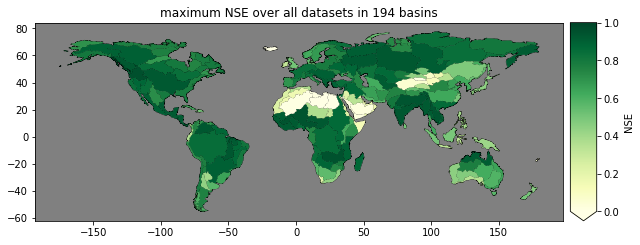

In [6]:
basins_plot=basins.loc[NSE_tab.index].copy()
basins_plot['max NSE']=np.nanmax(NSE_tab,axis=1)

fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='max NSE',
                 cmap=plt.cm.get_cmap('YlGn'),
                 vmin=0,vmax=1,
                 legend=True,cax=cax,
                legend_kwds={'label': "NSE",
                              'extend':'min'
                          },)
ax.set_facecolor("grey")
ax.set_title('maximum NSE over all datasets in {} basins'.format(NSE_tab.shape[0]))
plt.tight_layout()
plt.show()

# Method to select the largest cluster

Limit the columns names by removing TWS name

In [7]:
S=NSE_tab.copy()
#S.drop(bad_basins,inplace=True)
S.columns=[d[:-22] for d in S.columns]
S

,P_CPC_ET_ERA5_Land_R_ERA5_Land,P_CPC_ET_ERA5_Land_R_GLDAS20_CLSM25,P_CPC_ET_ERA5_Land_R_GLDAS20_NOAH36,P_CPC_ET_ERA5_Land_R_GLDAS20_VIC412,P_CPC_ET_ERA5_Land_R_GLDAS21_CLSM25,P_CPC_ET_ERA5_Land_R_GLDAS21_NOAH36,P_CPC_ET_ERA5_Land_R_GLDAS21_VIC412,P_CPC_ET_ERA5_Land_R_GLDAS22_CLSM25,P_CPC_ET_ERA5_Land_R_GRUN,P_CPC_ET_ERA5_Land_R_MERRA2,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
HYBAS_ID,,,,,,,,,,,,,,,,,,,,,
1030000010,-0.820982,NaN,-0.801253,-0.774574,NaN,-0.762819,-0.749424,-0.783839,-0.654794,-0.864122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030003990,-0.092304,NaN,-0.088918,-0.078246,NaN,-0.083151,-0.065887,-0.089646,-0.077204,-0.087625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030008100,0.083840,0.014307,0.165698,0.042090,0.053942,0.250028,0.096579,0.193323,0.064645,0.096610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030008110,-0.174549,NaN,-0.345791,-0.311607,NaN,-0.789895,-0.541109,-0.094152,-0.199098,-0.439036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030011660,-0.383540,NaN,-0.374532,-0.584519,NaN,-0.508397,-0.676973,-0.372986,-0.151383,-0.512374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030005520,0.484427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520955,0.516959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030009560,0.656902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680901,0.727567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030009570,0.473993,NaN,NaN,NaN,NaN,NaN,NaN,0.385023,0.585057,0.545451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compute the difference to the maximum NSE

In [8]:
Smax=np.nanmax(S,axis=1)
Sdiff=S.copy()
for col in S.columns:
    Sdiff[col]=Smax-S[col]
Sdiff

,P_CPC_ET_ERA5_Land_R_ERA5_Land,P_CPC_ET_ERA5_Land_R_GLDAS20_CLSM25,P_CPC_ET_ERA5_Land_R_GLDAS20_NOAH36,P_CPC_ET_ERA5_Land_R_GLDAS20_VIC412,P_CPC_ET_ERA5_Land_R_GLDAS21_CLSM25,P_CPC_ET_ERA5_Land_R_GLDAS21_NOAH36,P_CPC_ET_ERA5_Land_R_GLDAS21_VIC412,P_CPC_ET_ERA5_Land_R_GLDAS22_CLSM25,P_CPC_ET_ERA5_Land_R_GRUN,P_CPC_ET_ERA5_Land_R_MERRA2,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
HYBAS_ID,,,,,,,,,,,,,,,,,,,,,
1030000010,1.050462,NaN,1.030734,1.004055,NaN,0.992300,0.978905,1.013320,0.884274,1.093603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030003990,0.226519,NaN,0.223134,0.212462,NaN,0.217367,0.200102,0.223862,0.211420,0.221840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030008100,0.628979,0.698512,0.547121,0.670729,0.658877,0.462791,0.616240,0.519496,0.648174,0.616209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030008110,1.067174,NaN,1.238416,1.204232,NaN,1.682520,1.433734,0.986777,1.091723,1.331661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030011660,1.333131,NaN,1.324122,1.534109,NaN,1.457987,1.626563,1.322576,1.100973,1.461964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030005520,0.222435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185907,0.189903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030009560,0.243580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219580,0.172914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8030009570,0.296549,NaN,NaN,NaN,NaN,NaN,NaN,0.385519,0.185485,0.225092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For each basin, sort the combinations by decreasing Sdiff (same thing as increasing NSE).

In [9]:
sorted_combinations=pd.DataFrame(np.zeros_like(Sdiff),index=Sdiff.index,columns=np.arange(Sdiff.shape[1]))
cost=sorted_combinations.copy()

for basin_id in Sdiff.index:
    # rank all datasets
    temp=Sdiff.loc[basin_id].sort_values()
    sorted_combinations.loc[basin_id]=temp.index
    cost.loc[basin_id]=temp.values
    
    # rank only combinations with a NSE at least NSE_min --> pb: favours datasets with a lot of missing values
    #satisfying_datasets=promising_datasets[NSE_tab.loc[basin_id,promising_datasets]>NSE_min]
    #sorted_combinations.loc[basin_id,np.arange(len(satisfying_datasets))]=NSE_tab.loc[basin_id,satisfying_datasets].sort_values(ascending=False).index

# remove columns with no dataset
#sorted_combinations=sorted_combinations[np.arange(np.argmax(np.sum(sorted_combinations==0,axis=0)==NSE_tab.shape[0]))]
sorted_combinations

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
HYBAS_ID,,,,,,,,,,,,,,,,,,,,,
1030000010,P_CRU_ET_GLDAS22_CLSM25_R_GRUN,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS21_NOAH36,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS21_VIC412,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS22_CLSM25,P_CRU_ET_GLDAS22_CLSM25_R_MERRA2,P_CRU_ET_GLDAS22_CLSM25_R_ERA5_Land,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS20_NOAH36,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS20_VIC412,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,P_GPM_ET_GLDAS22_CLSM25_R_GLDAS21_NOAH36,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
1030003990,P_GPCP_ET_GLDAS21_NOAH36_R_GLDAS22_CLSM25,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GRUN,P_GPCP_ET_GLDAS21_NOAH36_R_GRUN,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS21_VIC412,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS21_NOAH36,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS22_CLSM25,P_ERA5_Land_ET_GLDAS20_NOAH36_R_MERRA2,P_GPCP_ET_GLDAS21_NOAH36_R_GLDAS20_NOAH36,P_ERA5_Land_ET_GLDAS20_NOAH36_R_ERA5_Land,P_GPCP_ET_GLDAS21_NOAH36_R_MERRA2,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
1030008100,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_GLDAS21_CLSM25_R_GLDAS21_CLSM25,P_MSWEP_ET_GLEAM_R_GLDAS21_CLSM25,P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2,P_MSWEP_ET_ERA5_Land_R_GLDAS22_CLSM25,P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_MSWEP_ET_ERA5_Land_R_GLDAS21_NOAH36,P_GPCP_ET_GLDAS21_CLSM25_R_GLDAS22_CLSM25,P_MSWEP_ET_GLEAM_R_MERRA2,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
1030008110,P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2,P_MSWEP_ET_ERA5_Land_R_MERRA2,P_GPCP_ET_GLDAS20_CLSM25_R_MERRA2,P_GPCP_ET_ERA5_Land_R_GRUN,P_MSWEP_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_GLDAS21_CLSM25_R_ERA5_Land,P_GPCP_ET_GLEAM_R_GRUN,P_MSWEP_ET_GLEAM_R_GRUN,P_GPCP_ET_GLDAS20_CLSM25_R_ERA5_Land,P_MSWEP_ET_ERA5_Land_R_GRUN,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
1030011660,P_ERA5_Land_ET_GLDAS21_CLSM25_R_GLDAS22_CLSM25,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_GPCP_ET_SSEBop_R_GRUN,P_ERA5_Land_ET_GLDAS21_CLSM25_R_MERRA2,P_ERA5_Land_ET_GLDAS21_CLSM25_R_GRUN,P_MSWEP_ET_SSEBop_R_GLDAS22_CLSM25,P_ERA5_Land_ET_SSEBop_R_ERA5_Land,P_GPM_ET_SSEBop_R_GRUN,P_MSWEP_ET_SSEBop_R_GRUN,P_MSWEP_ET_SSEBop_R_MERRA2,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS20_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS20_VIC412,P_TRMM_ET_SSEBop_R_GLDAS21_CLSM25,P_TRMM_ET_SSEBop_R_GLDAS21_NOAH36,P_TRMM_ET_SSEBop_R_GLDAS21_VIC412,P_TRMM_ET_SSEBop_R_GLDAS22_CLSM25,P_TRMM_ET_SSEBop_R_GRUN,P_TRMM_ET_SSEBop_R_MERRA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030005520,P_GPCP_ET_GLDAS20_CLSM25_R_GRUN,P_ERA5_Land_ET_GLEAM_R_GRUN,P_GPCP_ET_ERA5_Land_R_GRUN,P_ERA5_Land_ET_MOD16_R_GRUN,P_GPCP_ET_GLDAS21_NOAH36_R_GRUN,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_GPCP_ET_GLDAS21_VIC412_R_ERA5_Land,P_MERRA2_ET_MERRA2_R_GRUN,P_GPCP_ET_GLEAM_R_GRUN,P_ERA5_Land_ET_MERRA2_R_GRUN,...,P_TRMM_ET_SSEBop_R_ERA5_Land,P_TRMM_ET_SSEBop_R_GLDAS20_CLSM25,P_TR

Give the same importance to all combinations leading to a $NSE_{max}-NSE \le NSE_{diff, threshold}$ and remove other combinations.

In [10]:
NSE_diff_threshold=0.2
sorted_combinations_ok=sorted_combinations.copy()

for basin_id in Sdiff.index:
    n=cost.loc[basin_id,cost.loc[basin_id]<=NSE_diff_threshold].shape[0]
    sorted_combinations_ok.loc[basin_id][n:]='none'
sorted_combinations_ok

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
HYBAS_ID,,,,,,,,,,,,,,,,,,,,,
1030000010,P_CRU_ET_GLDAS22_CLSM25_R_GRUN,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS21_NOAH36,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS21_VIC412,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS22_CLSM25,P_CRU_ET_GLDAS22_CLSM25_R_MERRA2,P_CRU_ET_GLDAS22_CLSM25_R_ERA5_Land,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS20_NOAH36,P_CRU_ET_GLDAS22_CLSM25_R_GLDAS20_VIC412,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,P_GPM_ET_GLDAS22_CLSM25_R_GLDAS21_NOAH36,...,none,none,none,none,none,none,none,none,none,none
1030003990,P_GPCP_ET_GLDAS21_NOAH36_R_GLDAS22_CLSM25,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GRUN,P_GPCP_ET_GLDAS21_NOAH36_R_GRUN,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS21_VIC412,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS21_NOAH36,P_ERA5_Land_ET_GLDAS20_NOAH36_R_GLDAS22_CLSM25,P_ERA5_Land_ET_GLDAS20_NOAH36_R_MERRA2,P_GPCP_ET_GLDAS21_NOAH36_R_GLDAS20_NOAH36,P_ERA5_Land_ET_GLDAS20_NOAH36_R_ERA5_Land,P_GPCP_ET_GLDAS21_NOAH36_R_MERRA2,...,none,none,none,none,none,none,none,none,none,none
1030008100,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_GLDAS21_CLSM25_R_GLDAS21_CLSM25,P_MSWEP_ET_GLEAM_R_GLDAS21_CLSM25,P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2,P_MSWEP_ET_ERA5_Land_R_GLDAS22_CLSM25,P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_MSWEP_ET_ERA5_Land_R_GLDAS21_NOAH36,P_GPCP_ET_GLDAS21_CLSM25_R_GLDAS22_CLSM25,P_MSWEP_ET_GLEAM_R_MERRA2,...,none,none,none,none,none,none,none,none,none,none
1030008110,P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2,P_MSWEP_ET_ERA5_Land_R_MERRA2,P_GPCP_ET_GLDAS20_CLSM25_R_MERRA2,P_GPCP_ET_ERA5_Land_R_GRUN,P_MSWEP_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_GLDAS21_CLSM25_R_ERA5_Land,P_GPCP_ET_GLEAM_R_GRUN,P_MSWEP_ET_GLEAM_R_GRUN,P_GPCP_ET_GLDAS20_CLSM25_R_ERA5_Land,P_MSWEP_ET_ERA5_Land_R_GRUN,...,none,none,none,none,none,none,none,none,none,none
1030011660,P_ERA5_Land_ET_GLDAS21_CLSM25_R_GLDAS22_CLSM25,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_GPCP_ET_SSEBop_R_GRUN,P_ERA5_Land_ET_GLDAS21_CLSM25_R_MERRA2,P_ERA5_Land_ET_GLDAS21_CLSM25_R_GRUN,P_MSWEP_ET_SSEBop_R_GLDAS22_CLSM25,P_ERA5_Land_ET_SSEBop_R_ERA5_Land,P_GPM_ET_SSEBop_R_GRUN,P_MSWEP_ET_SSEBop_R_GRUN,P_MSWEP_ET_SSEBop_R_MERRA2,...,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030005520,P_GPCP_ET_GLDAS20_CLSM25_R_GRUN,P_ERA5_Land_ET_GLEAM_R_GRUN,P_GPCP_ET_ERA5_Land_R_GRUN,P_ERA5_Land_ET_MOD16_R_GRUN,P_GPCP_ET_GLDAS21_NOAH36_R_GRUN,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_GPCP_ET_GLDAS21_VIC412_R_ERA5_Land,P_MERRA2_ET_MERRA2_R_GRUN,P_GPCP_ET_GLEAM_R_GRUN,P_ERA5_Land_ET_MERRA2_R_GRUN,...,none,none,none,none,none,none,none,none,none,none
8030009560,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_MERRA2_ET_ERA5_Land_R_ERA5_Land,P_MERRA2_ET_ERA5_Land_R_GRUN,P_MERRA2_ET_MERRA2_R_ERA5_Land,P_GPCP_ET_ERA5_Land_R_ERA5_Land,P_MERRA2_ET_GLEAM_R_ERA5_Land,P_GPCP_ET_ERA5_Land_R_GRUN,P_MERRA2_ET_MERRA2_R_GRUN,P_GPCP_ET_ERA5_Land_R_MERRA2,...,none,none,none,none,none,none,none,none,none,none
8030009570,P_MERRA2_ET_GLEAM_R_GRUN,P_MERRA2_ET_MERRA2_R_GRUN,P_ERA5_Land_ET_ERA5_Land_R_GRUN,P_MERRA2_ET_ERA5_Land_R_GRUN,P_ERA5_Land_ET_GLEAM_R_GRUN,P_ERA5_Land_ET_GLDAS21_CLSM25_R_GRUN,P_ERA5_Land_ET_GLEAM_R_MERRA2,P_ERA5_Land_ET_MERRA2_R_GLDAS22_CLSM25,P_ERA5_Land_ET_MERRA2_R_GRUN,P_ERA5_Land_ET_MERRA2_R_MERRA2,...,none,none,none,none,none,none,none,none,none,none


Count the number of occurences of each combination selected above

In [11]:
unique_comb,counts_comb=np.unique(sorted_combinations_ok,return_counts=True)

# remove the last element that corresponds to 'none'
unique_comb=unique_comb[:-1]
counts_comb=counts_comb[:-1]

# associate each combination to its number of occurences
unique_comb_df=pd.Series(counts_comb,index=unique_comb)
unique_comb_df.sort_values(ascending=False,inplace=True)
unique_comb_df

P_GPCP_ET_ERA5_Land_R_GRUN                   125
P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land         120
P_GPCP_ET_GLEAM_R_GRUN                       119
P_ERA5_Land_ET_GLEAM_R_ERA5_Land             113
P_GPCC_ET_GLEAM_R_GRUN                       113
                                            ... 
P_TRMM_ET_GLDAS21_VIC412_R_GLDAS22_CLSM25      1
P_CRU_ET_MOD16_R_GLDAS21_VIC412                1
P_CRU_ET_MOD16_R_GLDAS22_CLSM25                1
P_TRMM_ET_GLEAM_R_GLDAS20_CLSM25               1
P_TRMM_ET_MOD16_R_GLDAS20_NOAH36               1
Length: 1062, dtype: int64

Function to summarize the steps above

In [12]:
def number_of_basins_per_equivalent_combinations(S,NSE_diff_threshold=0.2):
    Smax=np.nanmax(S,axis=1)
    Sdiff=S.copy()
    for col in S.columns:
        Sdiff[col]=Smax-S[col]
    
    # sort combinations for each basin and compute the cost matrix
    sorted_combinations=pd.DataFrame(np.zeros_like(Sdiff),index=Sdiff.index,columns=np.arange(Sdiff.shape[1]))
    cost=sorted_combinations.copy()
    for basin_id in Sdiff.index:
        # rank all datasets
        temp=Sdiff.loc[basin_id].sort_values()
        sorted_combinations.loc[basin_id]=temp.index
        cost.loc[basin_id]=temp.values
    
    # compute all combinations performing equally
    sorted_combinations_ok=sorted_combinations.copy()
    for basin_id in Sdiff.index:
        n=cost.loc[basin_id,cost.loc[basin_id]<=NSE_diff_threshold].shape[0]
        sorted_combinations_ok.loc[basin_id][n:]='none'
    sorted_combinations_ok

    # count the number of occurences of each combination
    unique_comb,counts_comb=np.unique(sorted_combinations_ok,return_counts=True)
    
    # remove the last element that corresponds to 'none'
    unique_comb=unique_comb[:-1]
    counts_comb=counts_comb[:-1]

    # associate each combination to its number of occurences
    unique_comb_df=pd.Series(counts_comb,index=unique_comb)
    unique_comb_df.sort_values(ascending=False,inplace=True)
    return unique_comb_df,sorted_combinations_ok

In [13]:
S=NSE_tab.copy()
S.columns=[d[:-22] for d in S.columns]
unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

cluster_basins=pd.DataFrame(np.nan*np.ones((NSE_tab.shape[0],2)),index=NSE_tab.index,columns=['cluster','NSE'])

# save results for the best combination
best_comb=unique_comb_df.index[0]
best_comb_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb,axis=1)>0].index
cluster_basins.loc[best_comb_basins,'cluster']=best_comb+' N:'+str(best_comb_basins.shape[0])
cluster_basins.loc[best_comb_basins,'NSE']=NSE_tab.loc[best_comb_basins,best_comb+'_TWS_'+data_TWS]

print('{} basins are not yet clustered'.format(np.isnan(cluster_basins['NSE']).sum()))

69 basins are not yet clustered


In [14]:
cluster_basins

,cluster,NSE
HYBAS_ID,,
1030000010,NaN,NaN
1030003990,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.021345
1030008100,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.621683
1030008110,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.883510
1030011660,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.875649
...,...,...
8030005520,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.687784
8030009560,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.803753
8030009570,P_GPCP_ET_ERA5_Land_R_GRUN N:125,0.599035


Plot basins in the largest cluster.

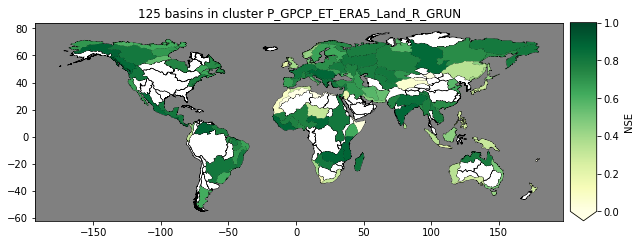

In [15]:
best_comb=unique_comb_df.index[0]
best_comb_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb,axis=1)>0].index

basins_plot=basins.loc[best_comb_basins].copy()
basins_plot[best_comb]=NSE_tab.loc[best_comb_basins,best_comb+'_TWS_'+data_TWS]

fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column=best_comb,
                 cmap=plt.cm.get_cmap('YlGn'),
                 vmin=0,vmax=1,
                 legend=True,cax=cax,
                legend_kwds={'label': "NSE",
                              'extend':'min'
                          },)
ax.set_facecolor("grey")
ax.set_title('{} basins in cluster {}'.format(best_comb_basins.shape[0],best_comb))
plt.tight_layout()
plt.show()

Remove basins from the 1st cluster and start again.

In [9]:
S.drop(best_comb_basins,inplace=True)
unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

best_comb2=unique_comb_df.index[0]
best_comb2_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb2,axis=1)>0].index

cluster_basins.loc[best_comb2_basins,'cluster']=best_comb2
cluster_basins.loc[best_comb2_basins,'NSE']=NSE_tab.loc[best_comb2_basins,best_comb2+'_TWS_'+data_TWS]
print('{} basins are not yet clustered'.format(np.isnan(cluster_basins['NSE']).sum()))

33 basins are not yet clustered


In [10]:
best_comb2=unique_comb_df.index[0]
best_comb2_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb2,axis=1)>0].index

basins_plot=basins.loc[best_comb2_basins].copy()
basins_plot[best_comb2]=NSE_tab.loc[best_comb2_basins,best_comb2+'_TWS_'+data_TWS]

fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column=best_comb2,
                 cmap=plt.cm.get_cmap('YlGn'),
                 vmin=0,vmax=1,
                 legend=True,cax=cax,
                legend_kwds={'label': "NSE",
                              'extend':'min'
                          },)
ax.set_facecolor("grey")
ax.set_title('{} basins in cluster {}'.format(best_comb2_basins.shape[0],best_comb2))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

Remove basins from the 2nd cluster

In [11]:
S.drop(best_comb2_basins,inplace=True)
unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

best_comb3=unique_comb_df.index[0]
best_comb3_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb3,axis=1)>0].index

cluster_basins.loc[best_comb3_basins,'cluster']=best_comb3
cluster_basins.loc[best_comb3_basins,'NSE']=NSE_tab.loc[best_comb3_basins,best_comb3+'_TWS_'+data_TWS]
print('{} basins are not yet clustered'.format(np.isnan(cluster_basins['NSE']).sum()))

16 basins are not yet clustered


<IPython.core.display.Javascript object>


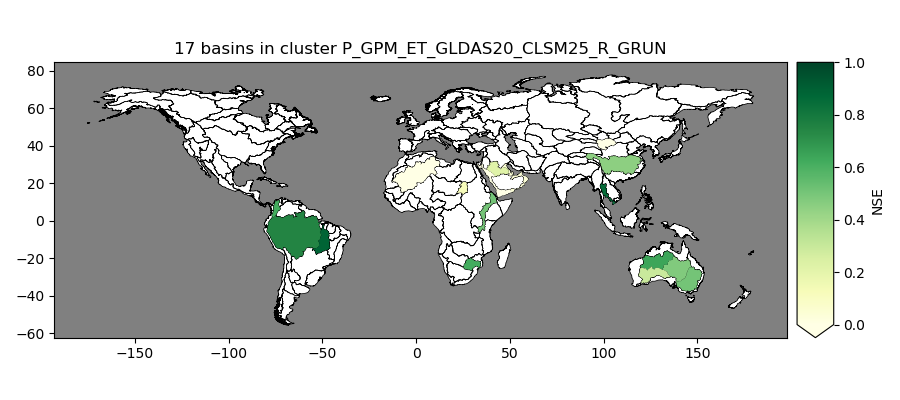

In [12]:
basins_plot=basins.loc[best_comb3_basins].copy()
basins_plot[best_comb3]=NSE_tab.loc[best_comb3_basins,best_comb3+'_TWS_'+data_TWS]

fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column=best_comb3,
                 cmap=plt.cm.get_cmap('YlGn'),
                 vmin=0,vmax=1,
                 legend=True,cax=cax,
                legend_kwds={'label': "NSE",
                              'extend':'min'
                          },)
ax.set_facecolor("grey")
ax.set_title('{} basins in cluster {}'.format(best_comb3_basins.shape[0],best_comb3))
plt.tight_layout()
plt.show()

Automate the process

In [48]:
S=NSE_tab.loc[:,promising_datasets].copy()
S.columns=[d[:-22] for d in S.columns]

cluster_basins=pd.DataFrame(np.nan*np.ones((NSE_tab.shape[0],2)),index=NSE_tab.index,columns=['cluster','NSE'])

best_comb_basins=[]
nb_basins_remaining=S.shape[0]

i=0
while i<10 and nb_basins_remaining>0:
    S.drop(best_comb_basins,inplace=True)
    unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

    #print(unique_comb_df.iloc[:3])
    
    # save results for the best combination
    best_comb=unique_comb_df.index[list_index[i]]
    best_comb_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb,axis=1)>0].index
    cluster_basins.loc[best_comb_basins,'cluster']=best_comb+' N:'+str(best_comb_basins.shape[0])
    cluster_basins.loc[best_comb_basins,'NSE']=NSE_tab.loc[best_comb_basins,best_comb+'_TWS_'+data_TWS]

    nb_basins_remaining=np.isnan(cluster_basins['NSE']).sum()
    print('I clustered {} basins in {}, {} basins are not yet clustered \n'.format(best_comb_basins.shape[0],
                                                            best_comb,nb_basins_remaining))
    i+=1

I clustered 125 basins in P_GPCP_ET_ERA5_Land_R_GRUN, 69 basins are not yet clustered 

I clustered 32 basins in P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2, 37 basins are not yet clustered 

I clustered 19 basins in P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land, 18 basins are not yet clustered 

I clustered 10 basins in P_GPM_ET_GLDAS22_CLSM25_R_GRUN, 8 basins are not yet clustered 



[125, 157, 176, 186]

<IPython.core.display.Javascript object>


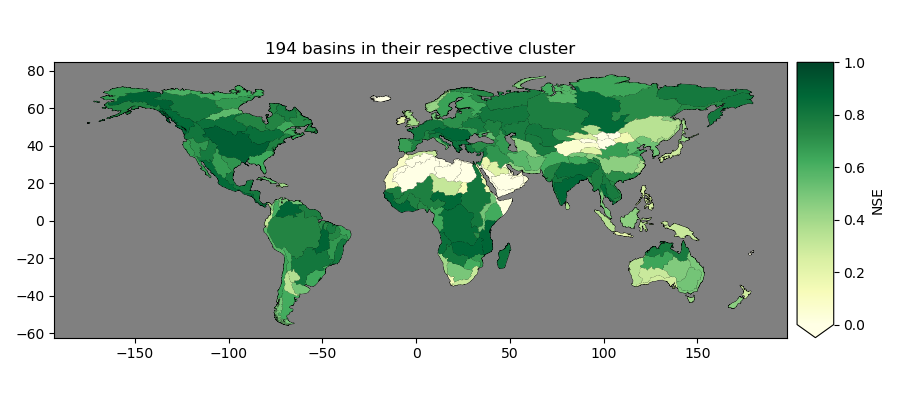

In [17]:
basins_plot=basins.loc[NSE_tab.index].copy()
basins_plot['NSE']=cluster_basins['NSE']

fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='NSE',
                 cmap=plt.cm.get_cmap('YlGn'),
                 vmin=0,vmax=1,
                 legend=True,cax=cax,
                legend_kwds={'label': "NSE",
                              'extend':'min'
                          },)
ax.set_facecolor("grey")
ax.set_title('{} basins in their respective cluster'.format(basins_plot.shape[0]))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


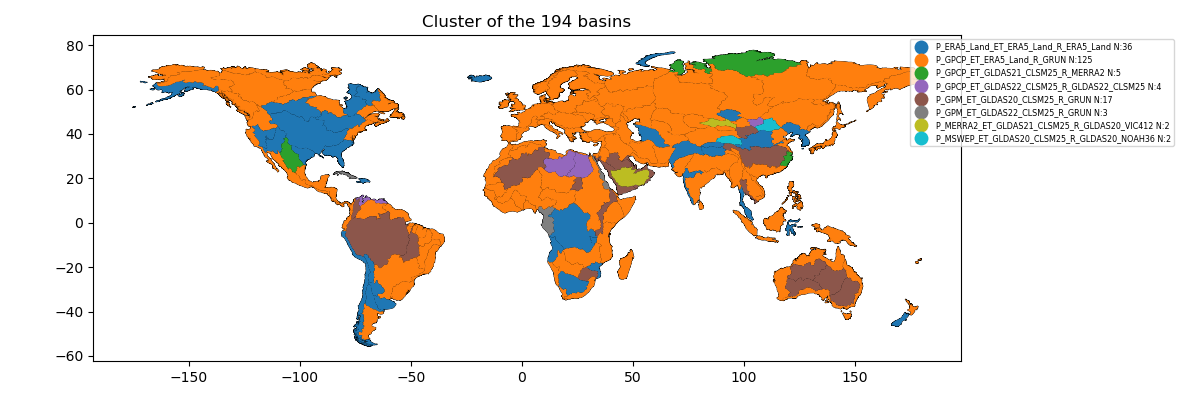

In [40]:
basins_plot=basins.loc[NSE_tab.index].copy()
basins_plot['cluster']=cluster_basins['cluster']

fig, ax = plt.subplots(figsize=(12,4))
ax.set_aspect('equal')
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='cluster',
                 #cmap=plt.cm.get_cmap('YlGn'),
                 #vmin=0,vmax=1,
                 legend=True,
                 #cax=cax,
                legend_kwds={
                    'bbox_to_anchor':(1.25,1.0),
                    'fontsize':'xx-small'
                    #'label': "NSE",
                #              'extend':'min'
                          },
                )
#ax.set_facecolor("grey")
ax.set_title('Cluster of the {} basins'.format(basins_plot.shape[0]))
plt.tight_layout()
#plt.subplots_adjust(right=0.7)
#fig.tight_layout(rect=[0,0,0.75,1])
plt.show()

# Optimize the number of basins covered by 4 clusters

Examine different indices to select the best combination among those leading to the most basins covered

In [19]:
big_list_nb_basins=[]
big_list_index=[]

for i1 in range(3):
    for i2 in range(3):
        for i3 in range(3):
            S=NSE_tab.copy()
            S.columns=[d[:-22] for d in S.columns]

            best_comb_basins=[]
            nb_basins_remaining=S.shape[0]
            cluster_basins=pd.DataFrame(np.nan*np.ones((NSE_tab.shape[0],2)),index=NSE_tab.index,columns=['cluster','NSE'])

            list_index=[i1,i2,i3,0]
            list_nb_basins=[]

            i=0
            while i<len(list_index) and nb_basins_remaining>0:
                S.drop(best_comb_basins,inplace=True)
                unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

                #print(unique_comb_df.iloc[:3])

                # save results for the best combination
                best_comb=unique_comb_df.index[list_index[i]]
                best_comb_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb,axis=1)>0].index
                cluster_basins.loc[best_comb_basins,'cluster']=best_comb+' N:'+str(best_comb_basins.shape[0])
                cluster_basins.loc[best_comb_basins,'NSE']=NSE_tab.loc[best_comb_basins,best_comb+'_TWS_'+data_TWS]

                nb_basins_remaining=np.isnan(cluster_basins['NSE']).sum()
                #print('I clustered {} basins in {}, {} basins are not yet clustered \n'.format(best_comb_basins.shape[0],
                #                                                        best_comb,nb_basins_remaining))
                if len(list_nb_basins)==0:
                    list_nb_basins.append(best_comb_basins.shape[0])
                else:
                    list_nb_basins.append(best_comb_basins.shape[0]+list_nb_basins[-1])
                i+=1
            print('({},{},{}) : {} basins remaining at the end'.format(i1,i2,i3,nb_basins_remaining))
            big_list_index.append(list_index)
            big_list_nb_basins.append(list_nb_basins)

(0,0,0) : 11 basins remaining at the end
(0,0,1) : 7 basins remaining at the end
(0,0,2) : 9 basins remaining at the end
(0,1,0) : 8 basins remaining at the end
(0,1,1) : 8 basins remaining at the end
(0,1,2) : 14 basins remaining at the end
(0,2,0) : 11 basins remaining at the end
(0,2,1) : 14 basins remaining at the end
(0,2,2) : 14 basins remaining at the end
(1,0,0) : 7 basins remaining at the end
(1,0,1) : 9 basins remaining at the end
(1,0,2) : 9 basins remaining at the end
(1,1,0) : 9 basins remaining at the end
(1,1,1) : 9 basins remaining at the end
(1,1,2) : 11 basins remaining at the end
(1,2,0) : 9 basins remaining at the end
(1,2,1) : 11 basins remaining at the end
(1,2,2) : 11 basins remaining at the end
(2,0,0) : 10 basins remaining at the end
(2,0,1) : 13 basins remaining at the end
(2,0,2) : 12 basins remaining at the end
(2,1,0) : 10 basins remaining at the end
(2,1,1) : 11 basins remaining at the end
(2,1,2) : 10 basins remaining at the end
(2,2,0) : 12 basins remain

Once you know which index you want to select at each stage of the process, save them in `list_index` and run the cell below.

In [63]:
S=NSE_tab.copy()
S.columns=[d[:-22] for d in S.columns]

best_comb_basins=[]
nb_basins_remaining=S.shape[0]
cluster_basins=pd.DataFrame(np.nan*np.ones((NSE_tab.shape[0],3)),index=NSE_tab.index,
                            columns=['cluster','NSE','nb basins'])

list_index=[1,0,0,0]
list_nb_basins=[]

i=0
while i<len(list_index) and nb_basins_remaining>0:
    S.drop(best_comb_basins,inplace=True)
    unique_comb_df,equiv_combinations=number_of_basins_per_equivalent_combinations(S)

    #print(unique_comb_df.iloc[:3])

    # save results for the best combination
    best_comb=unique_comb_df.index[list_index[i]]
    best_comb_basins=equiv_combinations.loc[np.sum(equiv_combinations==best_comb,axis=1)>0].index
    cluster_basins.loc[best_comb_basins,'cluster']=best_comb
    cluster_basins.loc[best_comb_basins,'nb basins']=best_comb_basins.shape[0]
    cluster_basins.loc[best_comb_basins,'NSE']=NSE_tab.loc[best_comb_basins,best_comb+'_TWS_'+data_TWS]

    nb_basins_remaining=np.isnan(cluster_basins['NSE']).sum()
    print('I clustered {} basins in {}, {} basins are not yet clustered \n'.format(best_comb_basins.shape[0],
                                                            best_comb,nb_basins_remaining))
    if len(list_nb_basins)==0:
        list_nb_basins.append(best_comb_basins.shape[0])
    else:
        list_nb_basins.append(best_comb_basins.shape[0]+list_nb_basins[-1])
    i+=1

# format cluster names to have consistent types in columns 'cluster'
cluster_basins.loc[np.isnan(cluster_basins['NSE']),'cluster']='other'

I clustered 120 basins in P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land, 74 basins are not yet clustered 

I clustered 47 basins in P_GPCP_ET_GLDAS21_CLSM25_R_GRUN, 27 basins are not yet clustered 

I clustered 13 basins in P_GPM_ET_GLDAS22_CLSM25_R_GRUN, 14 basins are not yet clustered 

I clustered 7 basins in P_GPCP_ET_ERA5_Land_R_GRUN, 7 basins are not yet clustered 



In [79]:
list(np.unique(cluster_basins['cluster']))

['P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land',
 'P_GPCP_ET_ERA5_Land_R_GRUN',
 'P_GPCP_ET_GLDAS21_CLSM25_R_GRUN',
 'P_GPM_ET_GLDAS22_CLSM25_R_GRUN',
 'other']

In [80]:
basins_plot=basins.loc[NSE_tab.index].copy()
# list of combinations highlighted as completing well each other from the selection process
#list_comb=['P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land',
#            'P_GPCP_ET_GLDAS21_CLSM25_R_GRUN',
#            'P_GPM_ET_GLDAS22_CLSM25_R_GRUN',
#            'P_GPCP_ET_ERA5_Land_R_GRUN',
#            'P_GPCP_ET_GLDAS21_CLSM25_R_MERRA2']
list_comb=list(np.unique(cluster_basins['cluster']))[:-1]

# save the NSE fro each selected combination
for comb in list_comb:
    basins_plot[comb]=NSE_tab.loc[:,comb+'_TWS_'+data_TWS]
    
# compute the maximum NSE over the selected combinations and over all combinations
basins_plot['max NSE selection']=np.nanmax(basins_plot[list_comb],axis=1)
basins_plot['max NSE']=np.nanmax(NSE_tab[datasets],axis=1)

Basins where the selection of combinations is too far from the best NSE

In [81]:
basins_plot['max NSE - max NSE selection']=basins_plot['max NSE'].values - basins_plot['max NSE selection'].values
basins_plot.sort_values(by='max NSE - max NSE selection',ascending=False).loc[:,['AREA','CLIMATE',
                                'max NSE','max NSE - max NSE selection']].iloc[:20]

,AREA,CLIMATE,max NSE,max NSE - max NSE selection
HYBAS_ID,,,,
4030050270,3.267923e+05,4,0.353828,0.637859
2030085510,1.263423e+06,16,0.020654,0.438339
1030040250,9.208747e+05,16,-0.418032,0.400718
4030050450,3.609770e+05,8,0.347873,0.303613
4030050290,3.394373e+05,8,0.443564,0.289563
4030050390,1.755573e+05,8,0.158982,0.254953
6030000750,2.645060e+05,16,0.697453,0.242254
4030009890,2.087976e+05,16,0.496748,0.195868
2030033480,2.326286e+05,4,0.619955,0.193116


<IPython.core.display.Javascript object>


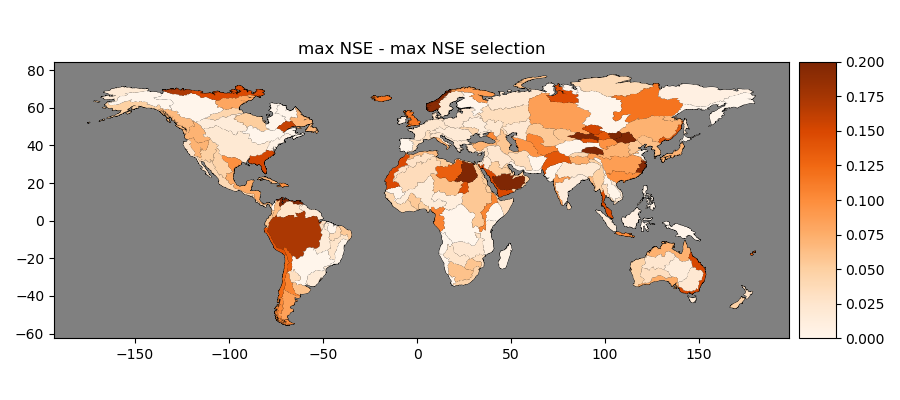

In [82]:
fig, ax = plt.subplots(figsize=(9,4))
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='max NSE - max NSE selection',
                 cmap=plt.cm.get_cmap('Oranges'),
                 vmin=0,vmax=NSE_diff_threshold,
                 legend=True,cax=cax,
                #legend_kwds={'label': "NSE",
                #              'extend':'min'
                #          },
                )
#basins_plot.loc[basins_plot['max NSE - max NSE selection']>NSE_diff_threshold].plot(ax=ax,
#                color='red')

ax.set_facecolor("grey")
ax.set_title('max NSE - max NSE selection')
plt.tight_layout()
plt.show()

Assign each basin to the best combination among the selection.

In [83]:
for basin_id in basins_plot.index:
    basins_plot.loc[basin_id,'cluster']=list_comb[np.argmax(basins_plot.loc[basin_id,list_comb])]
    
# For basins not achieving a satisfying performance among the selection, assign to 'other'
basins_plot.loc[basins_plot['max NSE - max NSE selection']>NSE_diff_threshold,'cluster']='other'

<IPython.core.display.Javascript object>


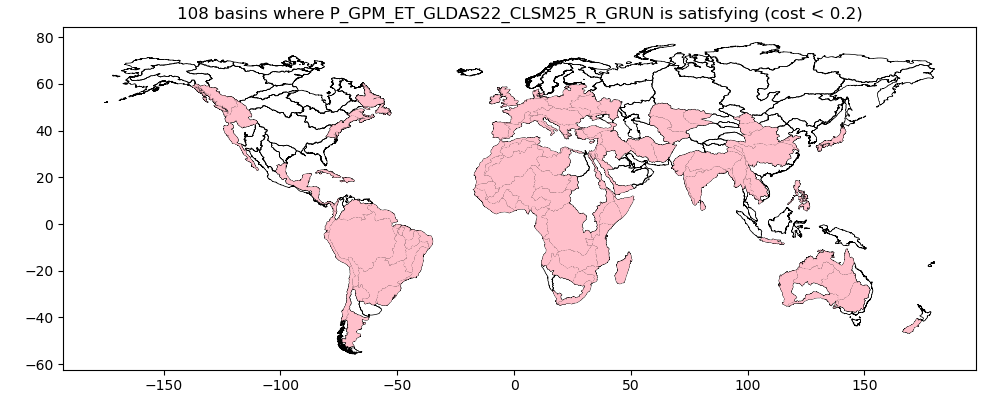

In [99]:
color_cluster=['tab:blue','tab:orange','tab:green','tab:pink','lightgrey']

i=3
comb=list_comb[i]

fig, ax = plt.subplots(figsize=(10,4))
ax.set_aspect('equal')
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.loc[Sdiff[comb]<NSE_diff_threshold].plot(ax=ax,
                color=color_cluster[i]
                )
ax.set_title('{} basins where {} is satisfying (cost < {:.1f})'.format(basins_plot.loc[Sdiff[comb]<NSE_diff_threshold].shape[0],
                                                                        comb,NSE_diff_threshold))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


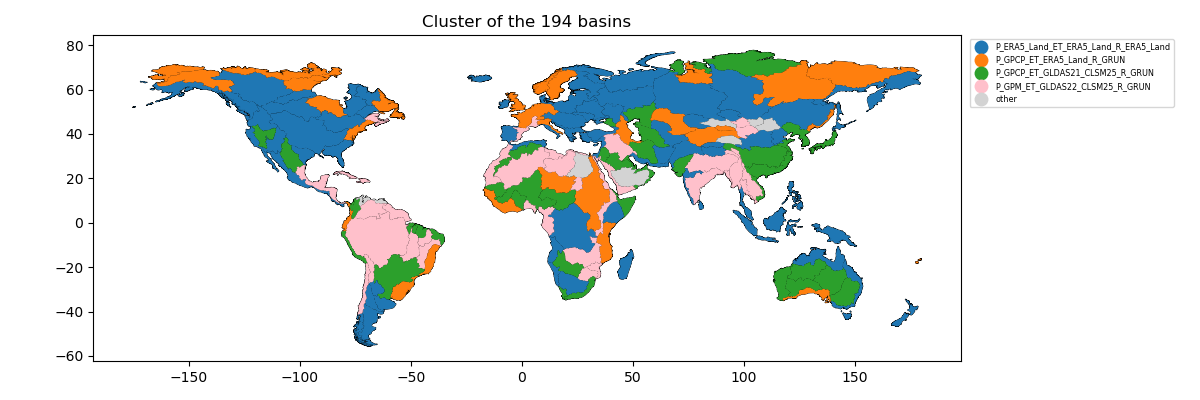

In [100]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_aspect('equal')
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='cluster',
                 cmap=ListedColormap(color_cluster),
                 #cmap=plt.cm.get_cmap('YlGn'),
                 #vmin=0,vmax=1,
                 legend=True,
                legend_kwds={
                    'bbox_to_anchor':(1.25,1.0),
                    'fontsize':'xx-small'
                    #'label': "NSE",
                #              'extend':'min'
                          },
                )
ax.set_title('Cluster of the {} basins'.format(basins_plot.shape[0]))
plt.tight_layout()
plt.show()

In [117]:
list_climate=np.unique(basins_plot['CLIMATE'])
df=pd.DataFrame(np.zeros((len(list_climate),len(list_comb))),index=list_climate,columns=list_comb)

for climate in list_climate:
    for comb in list_comb:
        df.loc[climate,comb]=basins_plot.loc[(basins_plot['CLIMATE']==climate)&(basins_plot['cluster']==comb)].shape[0]

df.index=['Cold and wet','Temperate and dry','Temperate and moist','Hot and moist','Hot and dry']
df.loc['Total']=np.sum(df,axis=0)
df['all']=np.sum(df,axis=1)
df

,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_ERA5_Land_R_GRUN,P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,all
Cold and wet,29.0,14.0,3.0,1.0,47.0
Temperate and dry,18.0,5.0,11.0,3.0,37.0
Temperate and moist,10.0,3.0,3.0,2.0,18.0
Hot and moist,12.0,5.0,9.0,18.0,44.0
Hot and dry,10.0,3.0,16.0,12.0,41.0
Total,79.0,30.0,42.0,36.0,187.0


# Link between Kmeans and combinations cluster

In [110]:
Nclusters_Kmeans=4
cluster_Kmeans=pd.read_csv("../results/Kmeans_clusters_N{}.csv".format(Nclusters_Kmeans),index_col=[0])
basins_plot['Kmeans']=cluster_Kmeans['cluster']
basins_plot.head()

,AREA,CLIMATE,geometry,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,P_GPCP_ET_ERA5_Land_R_GRUN,P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,max NSE selection,max NSE,max NSE - max NSE selection,cluster,Kmeans
HYBAS_ID,,,,,,,,,,,,
1030000010,2.336584e+05,16,"POLYGON ((37.19167 21.13333, 37.19106 21.14909...",-7.769611,-1.462530,-7.621746,0.177278,0.177278,0.229481,0.052203,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,1.0
1030003990,5.167208e+05,16,"POLYGON ((44.03333 1.10833, 44.02988 1.10745, ...",0.019851,0.021345,0.097748,0.021122,0.097748,0.134216,0.036468,P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,3.0
1030008100,7.943913e+05,16,"POLYGON ((36.74167 4.06667, 36.74131 4.06909, ...",0.712819,0.621683,0.679564,0.617845,0.712819,0.712819,0.000000,P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,1.0
1030008110,1.034723e+06,13,"MULTIPOLYGON (((36.95833 -18.02917, 36.96235 -...",0.807289,0.883510,0.848857,0.786091,0.883510,0.892625,0.009115,P_GPCP_ET_ERA5_Land_R_GRUN,0.0
1030011660,1.373188e+06,16,"POLYGON ((35.26250 -18.23333, 35.26215 -18.244...",0.900496,0.875649,0.883024,0.926860,0.926860,0.949590,0.022730,P_GPM_ET_GLDAS22_CLSM25_R_GRUN,0.0


In [115]:
df=pd.DataFrame(np.zeros((len(list_comb),Nclusters)),index=list_comb,
                columns=['Kmeans {}'.format(k) for k in range(Nclusters_Kmeans)])

for comb in list_comb:
    for k in range(Nclusters_Kmeans):
        df.loc[comb,'Kmeans {}'.format(k)]=basins_plot.loc[(Sdiff[comb]<NSE_diff_threshold)&(basins_plot['Kmeans']==k)].shape[0]

df.loc['Total']=np.sum(df,axis=0)
df['all']=np.sum(df,axis=1)
df.loc['Total','all']=''
df

,Kmeans 0,Kmeans 1,Kmeans 2,Kmeans 3,all
P_ERA5_Land_ET_ERA5_Land_R_ERA5_Land,77.0,28.0,9.0,6.0,120
P_GPCP_ET_ERA5_Land_R_GRUN,71.0,30.0,14.0,10.0,125
P_GPCP_ET_GLDAS21_CLSM25_R_GRUN,58.0,29.0,14.0,9.0,110
P_GPM_ET_GLDAS22_CLSM25_R_GRUN,51.0,36.0,12.0,9.0,108
Total,257.0,123.0,49.0,34.0,
